In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Replace with your dataset path
data = pd.read_csv('data.csv')
print(data.head())

            x           y  color
0  516.012706  393.014514      0
1  436.211762  408.656585      0
2  512.052601  372.022014      0
3  489.140464  401.807159      0
4  446.207986  338.516682      0


In [3]:
# Select numerical features
numerical_data = data.select_dtypes(include=['float64', 'int64']).dropna()

# Standardise the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

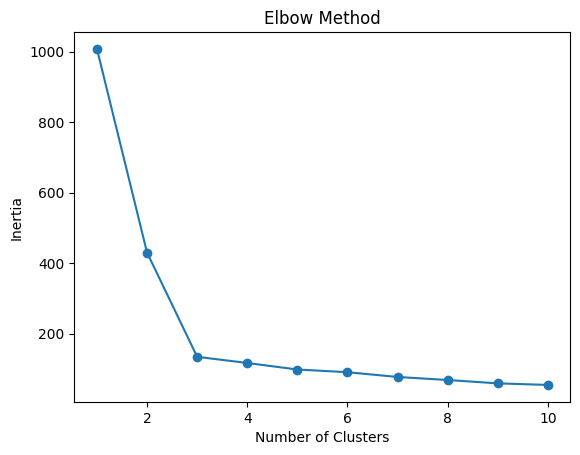

In [4]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [5]:
optimal_clusters = 4  # Choose based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data['Cluster'] = clusters
print(data.head())

            x           y  color  Cluster
0  516.012706  393.014514      0        2
1  436.211762  408.656585      0        2
2  512.052601  372.022014      0        2
3  489.140464  401.807159      0        2
4  446.207986  338.516682      0        2


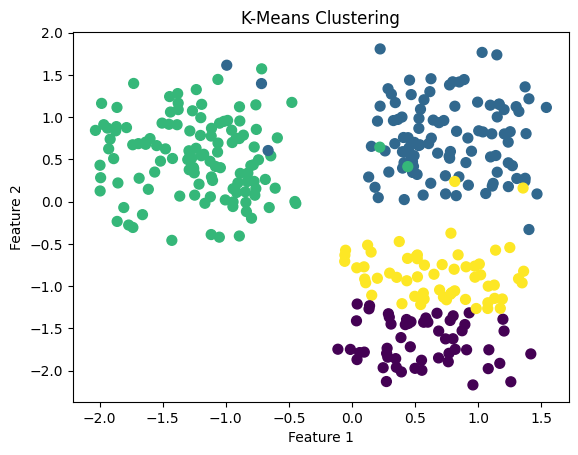

In [6]:
# Visualise the first two features (example)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()